In [1]:
import pandas as pd
import numpy as np
#from bs4 import BeautifulSoup
#import requests
import re
#from itertools import compress

#import pickle

import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

from collections import Counter

import matplotlib.pyplot as plt
%matplotlib inline

import plotly.express as px
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/laurenshores/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
pd.options.display.max_columns=300


## Analysis in relation to our target

Our Y variable is top performers...people who placed 3rd or higher. Do any of the features we have hold some predictive power in seeing how well a team performs?

In [14]:
# this dataset was generated from 00_Data_Collection.ipynb
dff = pd.read_csv("AmzingRceTeams_Data.csv")
dff.head()

,Age_x,Age_y,LGBT_team,AficanAm_team,Friend_team,Family_team,Stranger_team,Female_team,Male_team,Coed_team,AsianAm_team,Married_team,Disabled_team,Hispanic_team,Couple_or_Ex_team,Interracial_team,RealityShow_team,Season,RPlace,Name_x,Name_y,Hometown_x,Hometown_y,Avg_Age,Age_Diff,State_x,State_y,Same_State,Occupation_x,Occupation_y,profile_txt,profile_txt2,Top_3,Y
0,28,28,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,11,Matt Robar,Ana Robar,"Simsbury, Connecticut","Simsbury, Connecticut",28.0,0,Connecticut,Connecticut,True,Military folk,Military folk,"[""I'd most like to receive a letter from: Nobo...",['no profile info'],0,0
1,28,27,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,10,Kim Smith,Leslie Kellner,"Baytown, Texas","Baytown, Texas",27.5,1,Texas,Texas,True,Teachers,Teachers,"[""I'd most like to receive a letter from: Caro...",['no profile info'],0,0
2,43,42,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,9,Pat Pierce,Brenda Mehta,"Landenberg, Pennsylvania","Elkton, Maryland",42.5,1,Pennsylvania,Maryland,False,Missing,Missing,"[""I'd most like to receive a letter from: My k...",['no profile info'],0,0
3,65,60,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,8,Dave Groark,Margaretta Groark,"Rockwall, Texas","Rockwall, Texas",62.5,5,Texas,Texas,True,Air Force Pilot,Retired,"[""I'd most like to receive a letter from: My k...",['no profile info'],0,0
4,32,27,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,7,Paul Alessi,Amie Barsky,"Los Angeles, California","Los Angeles, California",29.5,5,California,California,True,Actor,Bartender,"[""I'd most like to receive a letter from: Brot...",['no profile info'],0,0


In [15]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313 entries, 0 to 312
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age_x              313 non-null    int64  
 1   Age_y              313 non-null    int64  
 2   LGBT_team          313 non-null    int64  
 3   AficanAm_team      313 non-null    int64  
 4   Friend_team        313 non-null    int64  
 5   Family_team        313 non-null    int64  
 6   Stranger_team      313 non-null    int64  
 7   Female_team        313 non-null    int64  
 8   Male_team          313 non-null    int64  
 9   Coed_team          313 non-null    int64  
 10  AsianAm_team       313 non-null    int64  
 11  Married_team       313 non-null    int64  
 12  Disabled_team      313 non-null    int64  
 13  Hispanic_team      313 non-null    int64  
 14  Couple_or_Ex_team  313 non-null    int64  
 15  Interracial_team   313 non-null    int64  
 16  RealityShow_team   313 non

In [16]:
dff.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age_x,313.0,35.185304,10.652924,21.0,27.0,32.0,42.0,71.0
Age_y,313.0,32.191693,9.625437,19.0,25.0,30.0,37.0,68.0
LGBT_team,313.0,0.108626,0.311668,0.0,0.0,0.0,0.0,1.0
AficanAm_team,313.0,0.121406,0.327121,0.0,0.0,0.0,0.0,1.0
Friend_team,313.0,0.322684,0.468251,0.0,0.0,0.0,1.0,1.0
Family_team,313.0,0.249201,0.433243,0.0,0.0,0.0,0.0,1.0
Stranger_team,313.0,0.051118,0.220591,0.0,0.0,0.0,0.0,1.0
Female_team,313.0,0.230032,0.421527,0.0,0.0,0.0,0.0,1.0
Male_team,313.0,0.265176,0.442134,0.0,0.0,0.0,1.0,1.0
Coed_team,313.0,0.498403,0.500798,0.0,0.0,0.0,1.0,1.0


Text(0.5, 1.0, 'Age')

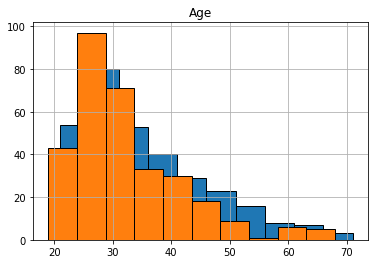

In [17]:
dff['Age_x'].hist(edgecolor='black')
dff['Age_y'].hist(edgecolor='black')
plt.title('Age')

Text(0.5, 1.0, 'Age Difference')

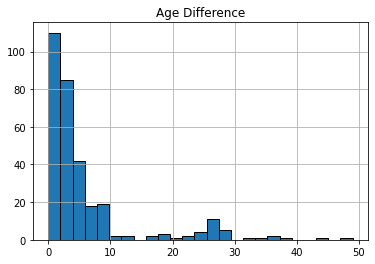

In [13]:
abs(dff['Age_x'] - dff['Age_y']).hist(edgecolor='black', bins=25)
plt.title('Age Difference')

In [63]:
dff['Avg_Age'] = np.mean([dff['Age_x'], dff['Age_y']],axis=0)
dff['Age_Diff'] = abs(dff['Age_x'] - dff['Age_y'])

Text(0.5, 1.0, 'Distribution of Average Age of Team by Winning and Losing Teams')

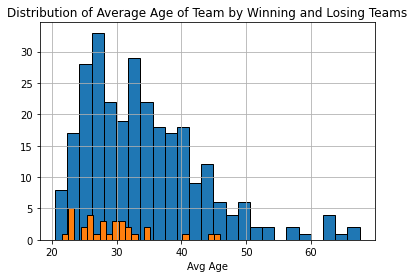

In [37]:
# do avg age and plot as a histogram
dff[dff['Y'] ==0]['Avg_Age'].hist(edgecolor='black', bins=25)
dff[dff['Y'] ==1]['Avg_Age'].hist(edgecolor='black', bins=25)
plt.xlabel("Avg Age")
plt.title('Distribution of Average Age of Team by Winning and Losing Teams')

Text(0.5, 1.0, 'Distribution of Age Difference of Team by Winning and Losing Teams')

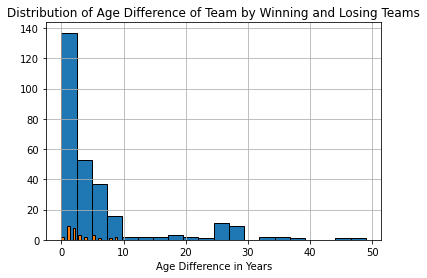

In [44]:
dff[dff['Y'] ==0]['Age_Diff'].hist(edgecolor='black', bins=20)
dff[dff['Y'] ==1]['Age_Diff'].hist(edgecolor='black', bins=20)
plt.xlabel("Age Difference in Years")
plt.title('Distribution of Age Difference of Team by Winning and Losing Teams')

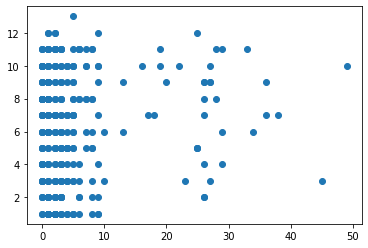

In [64]:
plt.scatter(dff['Age_Diff'], dff['RPlace'])

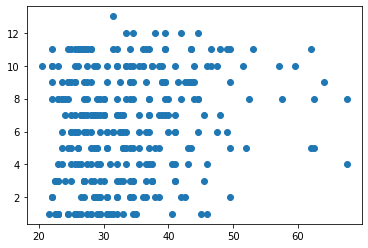

In [65]:
plt.scatter(dff['Avg_Age'], dff['RPlace'])

In [26]:
dff.Same_State.value_counts()#/len(dff)

True     235
False     78
Name: Same_State, dtype: int64

In [28]:
dff[['Y','Same_State']].value_counts()

Y  Same_State
0  True          213
   False          69
1  True           22
   False           9
dtype: int64

In [68]:
print(dff.groupby(by=[ "Y", "Same_State"]).size())
print("------------------------- Contestants from same state")
print(dff[dff['Same_State'] == True].groupby(by=["Y", "State_x"],as_index=False) \
      .size().sort_values(['Y', 'size'], ascending=[True, False]))
print("------------------------- Contestants from different state - state_x")
print(dff[dff['Same_State'] == False].groupby(by=["Y", "State_x"],as_index=False) \
      .size().sort_values(['Y', 'size'], ascending=[True, False]))

print("------------------------- Contestants from different state - state_y")
print(dff[dff['Same_State'] == False].groupby(by=["Y", "State_y"],as_index=False) \
      .size().sort_values(['Y', 'size'], ascending=[True, False]))


Y  Same_State
0  False          69
   True          213
1  False           9
   True           22
dtype: int64
------------------------- Contestants from same state
    Y          State_x  size
3   0       California    61
24  0         New York    21
6   0          Florida    16
34  0            Texas    16
31  0   South Carolina     9
10  0         Illinois     8
7   0          Georgia     7
0   0          Alabama     6
15  0    Massachusetts     6
33  0        Tennessee     6
12  0         Kentucky     4
13  0        Louisiana     4
22  0       New Jersey     4
26  0             Ohio     4
29  0     Pennsylvania     4
36  0         Virginia     4
16  0         Michigan     3
21  0           Nevada     3
28  0           Oregon     3
4   0         Colorado     2
5   0      Connecticut     2
8   0           Hawaii     2
18  0      Mississippi     2
30  0     Rhode Island     2
1   0          Arizona     1
2   0         Arkansas     1
9   0            Idaho     1
11  0           Kansas 

* Almost 1/3 of Contestants that come from same hometown are from California.
* Top 4 states for teams from same state make up 56% of contestants (CA, NY, FL, TX)
* 71% of winning teams do come from same hometown/state
* 75% of teams do come from the same state
* Wisconsin is notable in that it is one of the only low volume states that has had more than 1 winning teams

 California    0.310638
 New York      0.097872
 Florida       0.072340
 Texas         0.068085
Name: State_x, dtype: float64
0.548936170212766


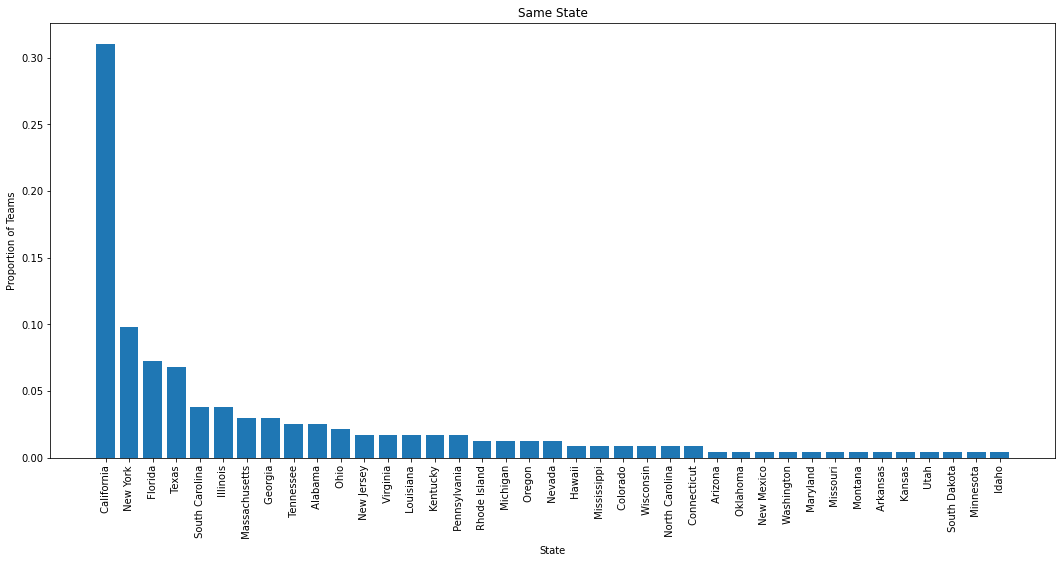

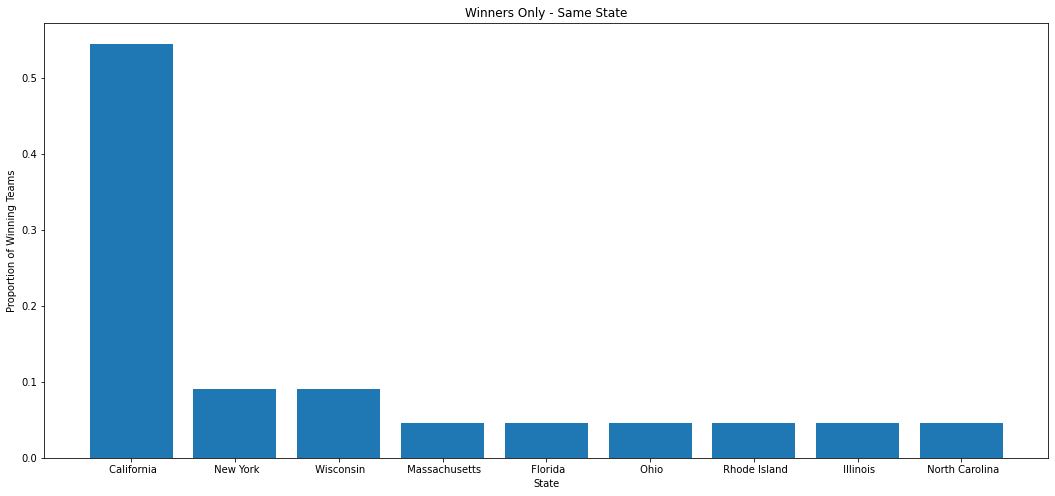

In [32]:
z = dff[dff['Same_State'] == True]['State_x'].value_counts()/len(dff[dff['Same_State'] == True])
z1 = dff[(dff['Same_State'] == True) & (dff['Y'] == 1)]['State_x'].value_counts()/len(dff[(dff['Same_State'] == True) & (dff['Y'] == 1)])
print(z[0:4])
print(z[0:4].sum())

fig, ax = plt.subplots(figsize=[18,8])
ax.bar(z.index, z.values)
ax.set_title('Same State')
ax.set_xlabel("State")
ax.set_ylabel("Proportion of Teams")
plt.xticks(rotation = 90)

fig, ax = plt.subplots(figsize=[18,8])
ax.bar(z1.index, z1.values)
ax.set_title('Winners Only - Same State')
ax.set_xlabel("State")
ax.set_ylabel("Proportion of Winning Teams")
#ax.set_xlabel("State")
#ax.set_ylabel("Proportion of Teams")
#plt.xticks(rotation = 90)

plt.show()
    

In [70]:
dff[(dff['Y'] == 1)]

,Season,RPlace,Name_x,Name_y,Hometown_x,Hometown_y,Age_x,Age_y,Relation,Occupation,profile_txt,profile_txt2,Occupation_x,Occupation_y,v1,v2,idx_occ_v1,idx_occ_v2,ohe_occ_v1,ohe_occ_v2,LGBT_team,AficanAm_team,Friend_team,Family_team,Stranger_team,Female_team,Male_team,Coed_team,AsianAm_team,Married_team,Disabled_team,Hispanic_team,Couple_or_Ex_team,Interracial_team,RealityShow_team,Top_3,Y,Avg_Age,Age_Diff,State_x,State_y,Same_State
8,1,1,Rob Frisbee,Brennan Swain,"Minneapolis, Minnesota","Rochester, New York",27,29,Best friends,Lawyers,"[""I'd most like to receive a letter from: Kell...",['no profile info'],Lawyers,Lawyers,[lawyer],[lawyer],"[256.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[256.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,28.0,2,Minnesota,New York,False
18,2,1,Chris Luca,Alex Boylan,"Boston, Massachusetts","Boston, Massachusetts",25,24,Lifelong friends,Bartender,[],"['\n', 'Chris and Alex met on the school bus h...",Bartender,Bartender,[bartend],[bartend],"[48.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[48.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,24.5,1,Massachusetts,Massachusetts,True
28,3,1,Flo Pesenti,Zach Behr,"New York, New York","New York, New York",23,23,Friends,Public relations associate<br/>Productions ass...,['Notes:\n\n1: Flo & Zach attempted Punt for t...,"['\n', ""New Yorkers Flo, 23, a public relation...",Public relations associate,Productions assistant,"[public, relat, associ]","[product, assist]","[372.0, 382.0, 34.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[364.0, 33.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,23.0,0,New York,New York,True
40,4,1,Reichen Lehmkuhl,Chip Arndt,"Los Angeles, California","Los Angeles, California",28,36,Married,Pilot <br/>Consultant/entrepreneur,[],"['\n', 'Twenty-eight-year-old Reichen is a pil...",Pilot,Consultant/entrepreneur,[pilot],"[consult, entrepreneur]","[342.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[104.0, 153.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,32.0,8,California,California,True
49,5,1,Chip McAllister,Kim McAllister,"Coto de Caza, California","Coto de Caza, California",46,44,Married parents,Owner of web company <br/>Owner of recruit com...,[],"['\n', 'Chip & Kim have been married for over ...",Owner of web company,Owner of recruit company,[owner],[owner],"[321.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[321.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,45.0,2,California,California,True
60,6,1,Freddy Holliday,Kendra Bentley,"Miami, Florida","Miami, Florida",34,25,Engaged models,Pilot/model <br/>Model,[],"['\n', ""Freddy & Kendra are an engaged couple ...",Pilot/model,Model,"[pilot, model]",[model],"[342.0, 289.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...","[289.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,29.5,9,Florida,Florida,True
79,8,1,Nick Linz,Alex Linz,"Cincinnati, Ohio","Cincinnati, Ohio",24,22,Siblings,Sales <br/>Emergency room tech <br/>College st...,"[""Notes:\n\n1: Leg 10 was a double-length leg,...",['no profile info'],Sales,Emergency room tech College students,[sale],"[emerg, room, tech, colleg, student]","[399.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[147.0, 396.0, 458.0, 92.0, 443.0, 0.0, 0.0, 0...","[0.0, 0.0, 0.0

In [23]:
dff['same_occupation'] = dff['Occupation_x'] == dff['Occupation_y']

In [25]:
dff[['Y', 'same_occupation']].value_counts()

Y  same_occupation
0  False              220
   True                62
1  False               22
   True                 9
dtype: int64

In [71]:
print(dff.groupby(['Y'])['Avg_Age'].mean())
print(dff.groupby(['Y'])['Age_Diff'].mean())

Y
0    34.184397
1    29.177419
Name: Avg_Age, dtype: float64
Y
0    5.858156
1    2.870968
Name: Age_Diff, dtype: float64


In [243]:
print(dff["Y"].value_counts())
print(dff["Male_team"].value_counts())

print(10/(230+83))
print(73/(230+83))
#print(2.5/31)

0    282
1     31
Name: Y, dtype: int64
0    230
1     83
Name: Male_team, dtype: int64
0.03194888178913738
0.23322683706070288


In [19]:
team_chars = ['LGBT_team',
       'AficanAm_team', 'Friend_team', 'Family_team', 'Stranger_team',
       'Female_team', 'Male_team', 'Coed_team', 'AsianAm_team', 'Married_team',
       'Disabled_team', 'Hispanic_team', 'Couple_or_Ex_team',
       'Interracial_team', 'RealityShow_team']

for i in team_chars:
    grp = dff.groupby(by=[ "Y", i], as_index=False).size()#.reset_index())
    pivot_table = grp.pivot_table(index='Y', columns=i, values='size', fill_value=0)
    #print(pivot_table/len(grp))
    print(pivot_table)


LGBT_team    0   1
Y                 
0          254  28
1           25   6
AficanAm_team    0   1
Y                     
0              246  36
1               29   2
Friend_team    0   1
Y                   
0            190  92
1             22   9
Family_team    0   1
Y                   
0            210  72
1             25   6
Stranger_team    0   1
Y                     
0              268  14
1               29   2
Female_team    0   1
Y                   
0            212  70
1             29   2
Male_team    0   1
Y                 
0          209  73
1           21  10
Coed_team    0    1
Y                  
0          145  137
1           12   19
AsianAm_team    0   1
Y                    
0             265  17
1              30   1
Married_team    0   1
Y                    
0             242  40
1              27   4
Disabled_team    0  1
Y                    
0              280  2
1               31  0
Hispanic_team    0  1
Y                    
0              276  6
1 

* Coed teams fare better (~46% of teams are coed), then male, last female. (24% and 22% respectively)
* Couples/Ex's fare better than married teams... I wonder if there's an age component to this
* Friend teams fare better than family

# Build a Simple Model

In [45]:
# Modelling
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
#from sklearn.model_selection import RandomizedSearchCV, train_test_split
#from scipy.stats import randint
from sklearn.metrics import classification_report

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
#import graphviz

import imblearn
from sklearn.model_selection import train_test_split
from sklearn import metrics

from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.pipeline import Pipeline


In [46]:
import xgboost as xgb

In [153]:
# Split the data into features (X) and target (y)


myfeatures = ['Age_x', 'Age_y',
            'LGBT_team',
            'AficanAm_team', 'Friend_team', 'Family_team', 'Stranger_team',
            'Female_team', 'Male_team', 'Coed_team', 'AsianAm_team', 'Married_team',
            'Disabled_team', 'Hispanic_team', 'Couple_or_Ex_team',
            'Interracial_team', 'RealityShow_team', 
            'Avg_Age','Age_Diff', 'Same_State',
              'same_occupation'
             # 'State_x', 'State_y'
             ]

X= dff[myfeatures]

#one hot encoding
#X= pd.get_dummies(dff[myfeatures], columns = ['State_x', 'State_y'])

y = dff['Top_3']

# using the train test split function
X_train, X_test, y_train, y_test = train_test_split(X, y ,
                                   random_state=122, 
                                   test_size=0.15, 
                                   shuffle=True)

In [154]:
# checking that train and test set have comparable winner distro
print("isWinner for test set: ", Counter(y_test)[1]/len(y_test))
print("isWinner for training set: ", Counter(y_train)[1]/len(y_train))


isWinner for test set:  0.3191489361702128
isWinner for training set:  0.2518796992481203


In [155]:
# Need to balance the data for best results. Using random undersampling here
#could also try random over samp from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X_train, y_train)

rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X_train, y_train)

from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 42) 
X_sm, y_sm = sm.fit_resample(X_train, y_train.ravel()) 


In [156]:
print('Smote Oversampled dataset shape %s' % Counter(y_sm))
print(len(X_sm))


print('Oversampled dataset shape %s' % Counter(y_ros))
print(len(X_ros))

print('Undersampled dataset shape %s' % Counter(y_rus))
print(len(X_rus))

Smote Oversampled dataset shape Counter({0: 199, 1: 199})
398
Oversampled dataset shape Counter({0: 199, 1: 199})
398
Undersampled dataset shape Counter({0: 67, 1: 67})
134


In [157]:
from sklearn.model_selection import cross_validate

# define pipeline
steps = [ ('model', xgb.XGBClassifier())] #RandomForestClassifier() xgb.XGBClassifier() DecisionTreeClassifier()
pipeline = Pipeline(steps=steps)
# evaluate pipeline

# split data into k smaller sets. train on k-1. Test on remaining 1 for performance. Avg results.
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=1) #shuffle=True
scoring = {'acc': 'accuracy',
           'prec_macro': 'precision_macro',
           'rec_micro': 'recall_macro',
          'f1': 'f1',
          'roc_auc': 'roc_auc'}
scores = cross_validate(pipeline, X_train, y_train, scoring=scoring, cv=cv, n_jobs=-1, return_estimator=True)
#print('Mean ROC AUC: %.3f' % np.mean(scores))

print(scores.keys())
#print(scores['test_acc']) 
print(scores['test_prec_macro'])
print("-------------------------------")
print(scores['test_rec_micro'])
print("-------------------------------")
print("avg recall: " + str(scores['test_rec_micro'].mean()))
print("avg precision: " + str(scores['test_prec_macro'].mean()))

#print(scores['estimator'])
#metrics.get_scorer_names()
# note that this auc is better if we leave out ohe vars

dict_keys(['fit_time', 'score_time', 'estimator', 'test_acc', 'test_prec_macro', 'test_rec_micro', 'test_f1', 'test_roc_auc'])
[0.54444444 0.65       0.59534884 0.55691057 0.56277056 0.68974359
 0.59534884 0.59534884 0.65       0.52884615 0.76139818 0.52747253
 0.50304878 0.44918699 0.63888889 0.67933131 0.55691057 0.49038462
 0.47893773 0.41805556 0.62262156 0.53372093 0.53372093 0.61994949
 0.49166667]
-------------------------------
[0.53214286 0.60384615 0.57884615 0.55384615 0.55311355 0.69821429
 0.57884615 0.57884615 0.60384615 0.52747253 0.65357143 0.52884615
 0.50288462 0.45192308 0.59157509 0.60535714 0.55384615 0.49038462
 0.47788462 0.4459707  0.60357143 0.52788462 0.52788462 0.59134615
 0.49450549]
-------------------------------
avg recall: 0.5542582417582417
avg precision: 0.5709622623634825


In [158]:
# Above cv gives combined performance metrics of training many models. What I'm talking about below is choosing a
# an answer by avging the answer of all models generated from cv training. But below is problematic because performance
# on test data is nothing like what we see in cv. 
# Is it because the resampling that happens on the training set is not reflected in the real test data

# this takes the model trained at index 5 and uses it to make predictions.

# what  would happen if we loop through all 50 trained models and made the prediction, then took the average (if predict
# probabilities) or the mode if we predict yes or no. for each test instance.

# Can then eventually think about doing this ensembling with cv models of other kinds, like rf or xgboost. Think
# about what are the strengths that some models are exhibiting, but others are not


pred = scores['estimator'][0].predict(X_test)#.score(X_test, y_test)

confusion_matrix = metrics.confusion_matrix(y_test, pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

# predict
print('ROCAUC score:',roc_auc_score(y_test, pred))
print('Accuracy score:',accuracy_score(y_test, pred))
print('F1 score:',f1_score(y_test, pred))
print('recall score:', recall_score(y_test, pred))
print('precision score:', precision_score(y_test, pred))
    

ROCAUC score: 0.459375
Accuracy score: 0.5531914893617021
F1 score: 0.22222222222222224
recall score: 0.2
precision score: 0.25


In [159]:
# trying the above ensembling

model_preds = []
for i in range(25):
    
    pred = scores['estimator'][i].predict(X_test)#.score(X_test, y_test)
    
    model_preds.append(pred)

In [160]:
len(model_preds[0])

47

In [161]:
#model_preds
import statistics

# Function to get the mode for the same index of a list of arrays
def get_mode_for_index(list_of_arrays, index):
    values = [array[index] for array in list_of_arrays]
    return statistics.mode(values)

pred_modes = []
for i in range(len(model_preds[0])):  # Index for which you want to find the mode
    mode_for_index = get_mode_for_index(model_preds, i)
    pred_modes.append(mode_for_index)
    
print('ROCAUC score:',roc_auc_score(y_test, pred_modes))
print('Accuracy score:',accuracy_score(y_test, pred_modes))
print('F1 score:',f1_score(y_test, pred_modes))
print('recall score:', recall_score(y_test, pred_modes))
print('precision score:', precision_score(y_test, pred_modes))

ROCAUC score: 0.44375
Accuracy score: 0.5319148936170213
F1 score: 0.21428571428571427
recall score: 0.2
precision score: 0.23076923076923078


In [162]:
print(scores)

{'fit_time': array([0.11133075, 0.11489987, 0.11781502, 0.11457467, 0.11333418,
       0.11081672, 0.1086359 , 0.11316609, 0.13685513, 0.1414001 ,
       0.13208723, 0.14206195, 0.12776279, 0.13514185, 0.12310624,
       0.13118577, 0.12284589, 0.11261916, 0.11123729, 0.11552477,
       0.11308312, 0.11152816, 0.11605692, 0.11616087, 0.09460092]), 'score_time': array([0.02244306, 0.02185011, 0.02309608, 0.02135015, 0.02345705,
       0.02218413, 0.02250791, 0.02511001, 0.02575994, 0.03232098,
       0.03377295, 0.02634597, 0.02833414, 0.03026104, 0.03334498,
       0.03064609, 0.023247  , 0.02633286, 0.02410173, 0.02260709,
       0.0241847 , 0.02225375, 0.02210617, 0.02081895, 0.01666212]), 'estimator': [Pipeline(steps=[('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rou

In [163]:
scores2 = cross_val_score(pipeline, X_rus, y_rus, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC for Random Undersampling: %.3f' % np.mean(scores2))

scores4 = cross_val_score(pipeline, X_ros, y_ros, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC for Random Oversampling: %.3f' % np.mean(scores3))

scores3 = cross_val_score(pipeline, X_sm, y_sm, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC for SMOTE: %.3f' % np.mean(scores3))


Mean ROC AUC for Random Undersampling: 0.600
Mean ROC AUC for Random Oversampling: 0.869
Mean ROC AUC for SMOTE: 0.868


In [164]:
def model_pred_fun(model_init,X_tr, y_tr, X_tst, y_tst):
    """function to more easily fit and evaluate different models to different datasets.
    model_init is the model initiator: example: DecisionTreeClassifier()"""
    
    model = model_init
    
    model.fit(X_tr, y_tr)
    
    pred = model.predict(X_tst)
    
    pred_prob = model.predict_proba(X_tst)
    
    confusion_matrix = metrics.confusion_matrix(y_tst, pred)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
    
    # predict
    print('ROCAUC score:',roc_auc_score(y_tst, pred))
    print('Accuracy score:',accuracy_score(y_tst, pred))
    print('F1 score:',f1_score(y_tst, pred))
    print('recall score:', recall_score(y_test, pred))
    print('precision score:', precision_score(y_test, pred))
    cm_display.plot()
    plt.show()
    
    
    
    return pred, model, pred_prob

One interesting this: undersampling vs. oversampling.
* When I used oversampling, the models barely ever predicted any winners. However, when I undersampled, it made more predictions for positive of the isWinner class. However, having a ton of wrong winner predictions is not helpful.
* Without doing any undersampling, we don't correctly predict any winners at all for either models

Decision Tree with SMOTE data------------
ROCAUC score: 0.5260416666666666
Accuracy score: 0.5957446808510638
F1 score: 0.3448275862068965
recall score: 0.3333333333333333
precision score: 0.35714285714285715


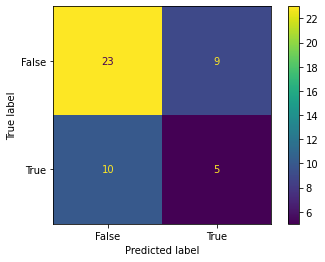

***********************************************
Decision Tree with oversampled data------------
ROCAUC score: 0.5885416666666666
Accuracy score: 0.6808510638297872
F1 score: 0.4
recall score: 0.3333333333333333
precision score: 0.5


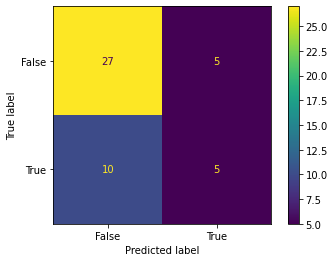

***********************************************
Decision Tree with Undersampled data------------
ROCAUC score: 0.4854166666666666
Accuracy score: 0.46808510638297873
F1 score: 0.3902439024390244
recall score: 0.5333333333333333
precision score: 0.3076923076923077


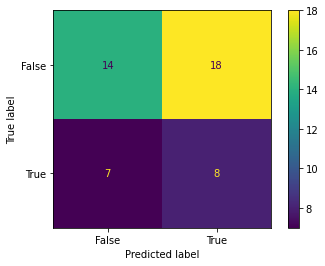

***********************************************
Decision Tree not sampled
ROCAUC score: 0.3927083333333333
Accuracy score: 0.5106382978723404
F1 score: 0.08
recall score: 0.06666666666666667
precision score: 0.1


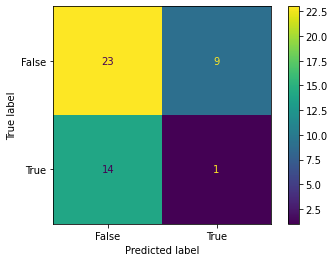

***********************************************
Random Forest with SMOTE data------------
ROCAUC score: 0.5395833333333333
Accuracy score: 0.6382978723404256
F1 score: 0.32
recall score: 0.26666666666666666
precision score: 0.4


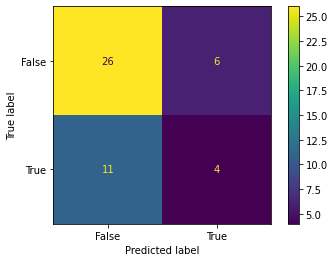

***********************************************
Random Forest with oversampled data------------
ROCAUC score: 0.5083333333333333
Accuracy score: 0.5957446808510638
F1 score: 0.2962962962962963
recall score: 0.26666666666666666
precision score: 0.3333333333333333


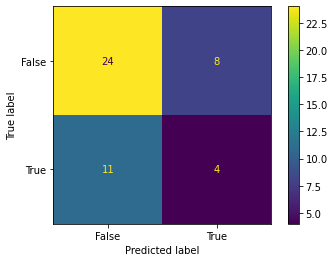

***********************************************
Random Forest with Undersampled data------------
ROCAUC score: 0.5208333333333333
Accuracy score: 0.46808510638297873
F1 score: 0.4444444444444444
recall score: 0.6666666666666666
precision score: 0.3333333333333333


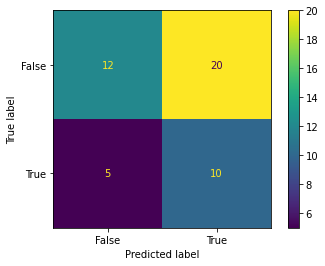

***********************************************
Random Forest not sampled
ROCAUC score: 0.48854166666666665
Accuracy score: 0.6170212765957447
F1 score: 0.18181818181818182
recall score: 0.13333333333333333
precision score: 0.2857142857142857


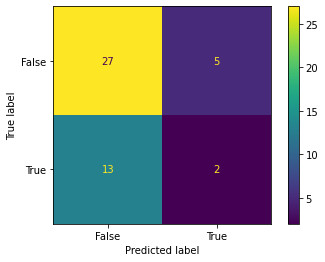

***********************************************
XGBoost with SMOTE data------------
ROCAUC score: 0.5416666666666666
Accuracy score: 0.6170212765957447
F1 score: 0.3571428571428571
recall score: 0.3333333333333333
precision score: 0.38461538461538464


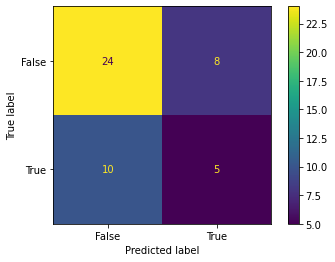

***********************************************
XGBoost with oversampled data------------
ROCAUC score: 0.39479166666666665
Accuracy score: 0.48936170212765956
F1 score: 0.14285714285714288
recall score: 0.13333333333333333
precision score: 0.15384615384615385


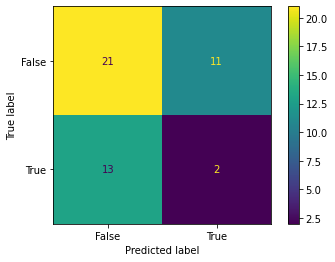

***********************************************
XGBoost with undersampled data------------
ROCAUC score: 0.4697916666666666
Accuracy score: 0.44680851063829785
F1 score: 0.38095238095238093
recall score: 0.5333333333333333
precision score: 0.2962962962962963


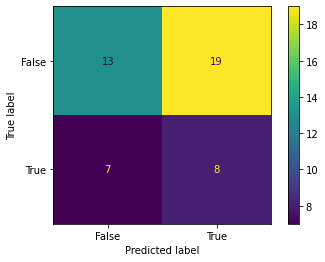

***********************************************
XGBoost not sampled
ROCAUC score: 0.428125
Accuracy score: 0.5106382978723404
F1 score: 0.20689655172413796
recall score: 0.2
precision score: 0.21428571428571427


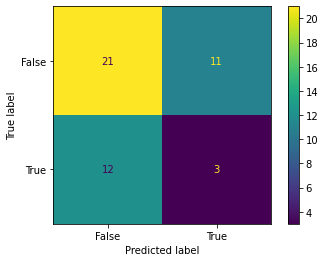

***********************************************


In [165]:
print("Decision Tree with SMOTE data------------")
pred_tree4, tree4, prob_tree4 = model_pred_fun(DecisionTreeClassifier(),X_sm, y_sm, X_test, y_test)
print("***********************************************")


print("Decision Tree with oversampled data------------")
pred_tree1, tree1, prob_tree1 = model_pred_fun(DecisionTreeClassifier(),X_ros, y_ros, X_test, y_test)
print("***********************************************")

print("Decision Tree with Undersampled data------------")
pred_tree3, tree3, prob_tree3 = model_pred_fun(DecisionTreeClassifier(),X_rus, y_rus, X_test, y_test)
print("***********************************************")

print("Decision Tree not sampled")
pred_tree2, tree2, prob_tree2 = model_pred_fun(DecisionTreeClassifier(),X_train, y_train, X_test, y_test)
print("***********************************************")

#-------------------------------------------
print("Random Forest with SMOTE data------------")
pred_rfc4, rfc4, prob_rfc4 = model_pred_fun(RandomForestClassifier(),X_sm, y_sm, X_test, y_test)
print("***********************************************")

print("Random Forest with oversampled data------------")
pred_rfc1, rfc1, prob_rfc1 = model_pred_fun(RandomForestClassifier(),X_ros, y_ros, X_test, y_test)
print("***********************************************")

print("Random Forest with Undersampled data------------")
pred_rfc3, rfc3, prob_rfc3 = model_pred_fun(RandomForestClassifier(),X_rus, y_rus, X_test, y_test)
print("***********************************************")

print("Random Forest not sampled")
pred_rfc2, rfc2, prob_rfc2 = model_pred_fun(RandomForestClassifier(),X_train, y_train, X_test, y_test)
print("***********************************************")

#-------------------------------------------
print("XGBoost with SMOTE data------------")
pred_xgb1, xgb1, prob_xgb1 = model_pred_fun(xgb.XGBClassifier(),X_sm, y_sm, X_test, y_test)
print("***********************************************")
print("XGBoost with oversampled data------------")
pred_xgb1, xgb1, prob_xgb1 = model_pred_fun(xgb.XGBClassifier(),X_ros, y_ros, X_test, y_test)
print("***********************************************")
print("XGBoost with undersampled data------------")
pred_xgb3, xgb3, prob_xgb3 = model_pred_fun(xgb.XGBClassifier(),X_rus, y_rus, X_test, y_test)
print("***********************************************")
print("XGBoost not sampled")
pred_xgb2, xgb2, prob_xgb2 = model_pred_fun(xgb.XGBClassifier(),X_train, y_train, X_test, y_test)
print("***********************************************")


#https://stackoverflow.com/questions/43162506/undefinedmetricwarning-f-score-is-ill-defined-and-being-set-to-0-0-in-labels-wi




Recall is of interest here. Out of all the things that were actually Winners, what proportion did we accurately predict as Winners. For the undersampled data, AUC and recall are in step with each other. But this is not true for the models built with unbalanced data.

Precision is out of everything we predicted as a Winner, how much of that was actually a Winner. Precision scores tend to be low, particularly for undersampled data, suggesting a lot of False Positives. There is always tradeoff between these two measures. When we look at confusion matrix for rfc1, it is confirmed how high the FPs are. This definitely needs to be worked on, because we are capturing winners by brute force/overpredicting it.

It's clear that if we don't sample the data, the model just predicts everything as false (or most), achieving high accuracy, but not good for our purpose. If we undersample, the model predicts a pretty equal distribution of the outcomes win/lose, which is bad since we know that there are only very few winners. If we oversample, similar as no sample...most predictions are 0; if there are 1 preds, they are wrong. Adding ohe occupation vars don't seeme to make any difference in results

for xgboost not sampled, it performs very poorly, but at least it's making some guesses on if something is true, just got them wrong.

In [166]:
# here I'm going to take a look at feature importance from the simplest model, the decision tree

features = X.columns.tolist()

# Extracting the importances by sklearn 
importances_sk = rfc1.feature_importances_

# Creating a dataframe with the feature importance by sklearn
feature_importance_sk = {}
for i, feature in enumerate(features):
    feature_importance_sk[feature] = round(importances_sk[i], 3)

sorted_feature_imp = sorted(feature_importance_sk.items(), reverse=True, key=lambda x:x[1])
sorted_feature_imp

[('Age_x', 0.184),
 ('Age_y', 0.177),
 ('Avg_Age', 0.177),
 ('Age_Diff', 0.123),
 ('Same_State', 0.05),
 ('Female_team', 0.032),
 ('same_occupation', 0.031),
 ('AficanAm_team', 0.029),
 ('Coed_team', 0.027),
 ('Friend_team', 0.026),
 ('LGBT_team', 0.022),
 ('Couple_or_Ex_team', 0.021),
 ('Married_team', 0.019),
 ('Male_team', 0.015),
 ('Interracial_team', 0.015),
 ('Family_team', 0.014),
 ('AsianAm_team', 0.014),
 ('Stranger_team', 0.01),
 ('RealityShow_team', 0.009),
 ('Hispanic_team', 0.003),
 ('Disabled_team', 0.002)]

Right now, modeling efforts with our base team chars as well as including state dummies yield similar poor results.

Some potential improvements:
* using more slices of random samples to train on different samples
* a better way to augment the dataset...it is pretty small
* get xgboost working to see how it performs X
* add in our occupation vectors to see if that yields any info. convert the arrays back to df with names so can see feature importance
* think of any other possible features


## Model Experimentation

I want to train models based on datasets that have been balanced in a different way and average them to get a final prediction. Start with decision tree under and oversampled data.

In [114]:
#oversample : prob_tree1, prob_rfc1
#undersample : prob_tree3, prob_rfc3
#smote : prob_rfc4

# get the outcome probabilities for True. add a little noise so not working with 0 probabilities 
tree1 =[ i[1] for i in prob_tree1]
tree3 =[ i[1] for i in prob_tree3]
rfc1 = [ i[1] for i in prob_rfc1]
rfc3 =[ i[1] for i in prob_rfc3]
rfc4 =[ i[1] for i in prob_rfc4]
xgb1 =[ i[1] for i in prob_xgb1]
xgb3 =[ i[1] for i in prob_xgb3]


# find the mean probability of true

In [ ]:
# in regards to changing the threshold, a viz showing pred probabilities and if they're actually win or loose.
# perhaps a line to draw/magnify the cutoff

ROCAUC score: 0.5364583333333333
Accuracy score: 0.48936170212765956
F1 score: 0.4545454545454545
recall score: 0.6666666666666666
precision score: 0.3448275862068966


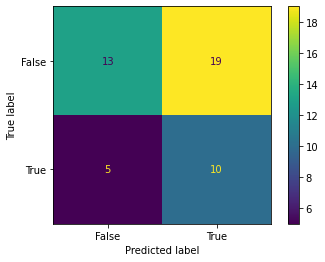

In [123]:
# This takes the predicted probabilities from 4 different trained models, averages the probabilities,
# and computes a prediction using a cutoff threshold of .5 (the standard)

new_pred_probs = [(xgb1[i] + rfc1[i] + rfc3[i] + rfc4[i])/4 for i in range(len(tree1)) ]
# convert to cat var
threshold =.30
new_preds = [1 if x > threshold else 0 for x in new_pred_probs]

confusion_matrix = metrics.confusion_matrix(y_test, new_preds)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

# predict
print('ROCAUC score:',roc_auc_score(y_test, new_preds))
print('Accuracy score:',accuracy_score(y_test, new_preds))
print('F1 score:',f1_score(y_test, new_preds))
print('recall score:', recall_score(y_test, new_preds))
print('precision score:', precision_score(y_test, new_preds))
cm_display.plot()
plt.show()
    

## Model Error Analysis

Maybe it would be good to see if the models are getting the same things wrong, or if they're capturing things that others aren't

In [214]:
 # Maybe it would be good to see if the models are getting the same things wrong, or if they're 
    # capturing things that others aren't

dict = {'oversamp_tree': tree1,'undersamp_tree' : tree3, 'oversamp_rf' :rfc1,
     'undersamp_rf': rfc3, 'smote_rf':rfc4, 'oversamp_xgb': xgb1, 'undersamp_xgb': xgb3, 'y': list(y_test)}
perform_check = pd.DataFrame(dict)
#perform_check['correct_cnt'] =

# the problem becomes find the booleans for all columns, save them somewhere and add them together
# (a list of lists?)
correct_bools = []
for c in perform_check.columns[0:-1]:
    outcome = np.where(perform_check[c] >= .5, 1, 0)
    check = outcome==perform_check['y'] 
    correct_bools.append(check)

perform_check['correct_cnter'] = [sum(x) for x in zip(*correct_bools)]

In [222]:
perform_check[perform_check["correct_cnter"] <=3]

,oversamp_tree,undersamp_tree,oversamp_rf,undersamp_rf,smote_rf,oversamp_xgb,undersamp_xgb,y,correct_cnter
0,1.0,0.0,0.370000,0.420000,0.350000,0.033368,0.057907,1,1
2,1.0,1.0,0.124286,0.523333,0.110000,0.081261,0.706710,0,3
3,0.0,1.0,0.510000,0.658333,0.940000,0.508086,0.509218,0,1
5,0.0,1.0,0.500000,0.630000,0.380000,0.243234,0.884311,0,3
7,0.0,0.0,0.030000,0.200000,0.110000,0.026236,0.025820,1,0
8,0.0,1.0,0.630000,0.750000,0.510000,0.815614,0.925494,0,1
17,1.0,1.0,0.950000,0.771667,0.990000,0.918561,0.828068,0,0
20,0.0,1.0,0.330000,0.650000,0.410000,0.066360,0.893390,1,3
22,0.0,1.0,0.550000,0.800000,0.410000,0.687222,0.932392,0,2
27,0.0,0.0,0.580667,0.624500,0.884667,0.655319,0.865141,0,2


In [221]:
perform_check[perform_check["correct_cnter"] >3]

,oversamp_tree,undersamp_tree,oversamp_rf,undersamp_rf,smote_rf,oversamp_xgb,undersamp_xgb,y,correct_cnter
1,1.0,1.0,0.160000,0.310000,0.110000,0.044512,0.323811,0,5
4,0.0,0.0,0.020000,0.070000,0.040000,0.000773,0.009417,0,7
6,0.0,0.0,0.170000,0.310000,0.140000,0.057135,0.624330,0,6
9,0.0,0.0,0.090000,0.300000,0.260000,0.001525,0.004779,0,7
10,1.0,1.0,0.750000,0.856000,0.820000,0.899236,0.985566,1,7
11,0.0,0.0,0.230000,0.330000,0.260000,0.811625,0.089782,0,6
12,1.0,1.0,0.330000,0.430000,0.300000,0.484497,0.765903,0,4
13,0.0,0.0,0.338333,0.440000,0.288333,0.025506,0.080391,0,7
14,0.0,0.0,0.050000,0.207500,0.060000,0.007476,0.015840,0,7
15,0.0,1.0,0.200000,0.290000,0.180000,0.043228,0.116364,0,6


In [220]:
32/47

0.6808510638297872

In [ ]:
# 3 is undersampled, 1 is oversampled
q = pd.DataFrame(prob_xgb2, list(y_test))
q= q.reset_index().rename(columns={"index":"y"})#[q.index == 1]

In [201]:
pd.concat([pd.DataFrame(q), pd.DataFrame(X_test).reset_index(drop=True)],axis=1)

,y,0,1,Age_x,Age_y,LGBT_team,AficanAm_team,Friend_team,Family_team,Stranger_team,Female_team,Male_team,Coed_team,AsianAm_team,Married_team,Disabled_team,Hispanic_team,Couple_or_Ex_team,Interracial_team,RealityShow_team,Avg_Age,Age_Diff,Same_State
0,1,0.967183,0.032817,27,27,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,27.0,0,False
1,0,0.814044,0.185956,50,24,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,37.0,26,False
2,0,0.948444,0.051556,25,26,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,25.5,1,True
3,0,0.842953,0.157047,28,28,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,28.0,0,True
4,0,0.999358,0.000642,61,54,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,57.5,7,True
5,0,0.753390,0.246610,42,37,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,39.5,5,True
6,0,0.963871,0.036129,32,33,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,32.5,1,True
7,1,0.978707,0.021293,51,25,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,38.0,26,True
8,0,0.210102,0.789898,28,31,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,29.5,3,False
9,0,0.999617,0.000383,46,42,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,44.0,4,True
